## 2. Processing amplicon sequence data

This notebook will guide you through the process of cleaning 16S rRNA sequences (removing low quality reads and chimeras), performing taxonomic assignments, and removing contaminants that was used to process the sequences from this study in R. You can find the R script in this same folder as dada2_processing.R.

### Loading packages and creating useful files

The first step is to set the directory where the sequences were downloaded as working directory:

In [ ]:
setwd(paste0("[your path]/data/raw/16S_rRNA_seqs"))

To confirm that the working directory is correct, we can run:

In [ ]:
getwd()

Follow the installation instructions for dada2: https://www.bioconductor.org/packages/release/bioc/html/dada2.html
After the installation, load the dada2 package:

In [9]:
library(dada2)

First, we will create variables that will make running the following commands easier. The variable samples will contain all the sample IDs from the file unique-sample-IDs.txt:

In [19]:
samples <- scan("unique-sample-IDs.txt", what = "character")
head(samples) # to peek at it

[1] "DO-01_S234"  "DO-101_S223" "DO-102_S255" "DO-105_S217" "DO-107_S233"
[6] "DO-10_S245"

The variable forward reads will hold the paths to all the forward reads:

In [18]:
forward_reads <- paste0("primer-trimmed-reads/", samples, "-trimmed-R1.fastq.gz")
head(forward_reads) # to peek at it

[1] "primer-trimmed-reads/DO-01_S234-trimmed-R1.fastq.gz" 
[2] "primer-trimmed-reads/DO-101_S223-trimmed-R1.fastq.gz"
[3] "primer-trimmed-reads/DO-102_S255-trimmed-R1.fastq.gz"
[4] "primer-trimmed-reads/DO-105_S217-trimmed-R1.fastq.gz"
[5] "primer-trimmed-reads/DO-107_S233-trimmed-R1.fastq.gz"
[6] "primer-trimmed-reads/DO-10_S245-trimmed-R1.fastq.gz"

Now we will create a directory to hold the output quality-filtered reads:

In [20]:
dir.create("quality-filtered-reads")

We will create empty variables that will be filled with the paths to the quality-filtered forward and reverse reads when we actually make those files:

In [21]:
filtered_forward_reads <- paste0("quality-filtered-reads/", samples, "-trimmed-filtered-R1.fastq.gz")
filtered_reverse_reads <- paste0("quality-filtered-reads/", samples, "-trimmed-filtered-R2.fastq.gz")

### Quality trimming/filtering

First, we will use the plotQualityProfile function to get a summary plot of the quality of the first sequence only:

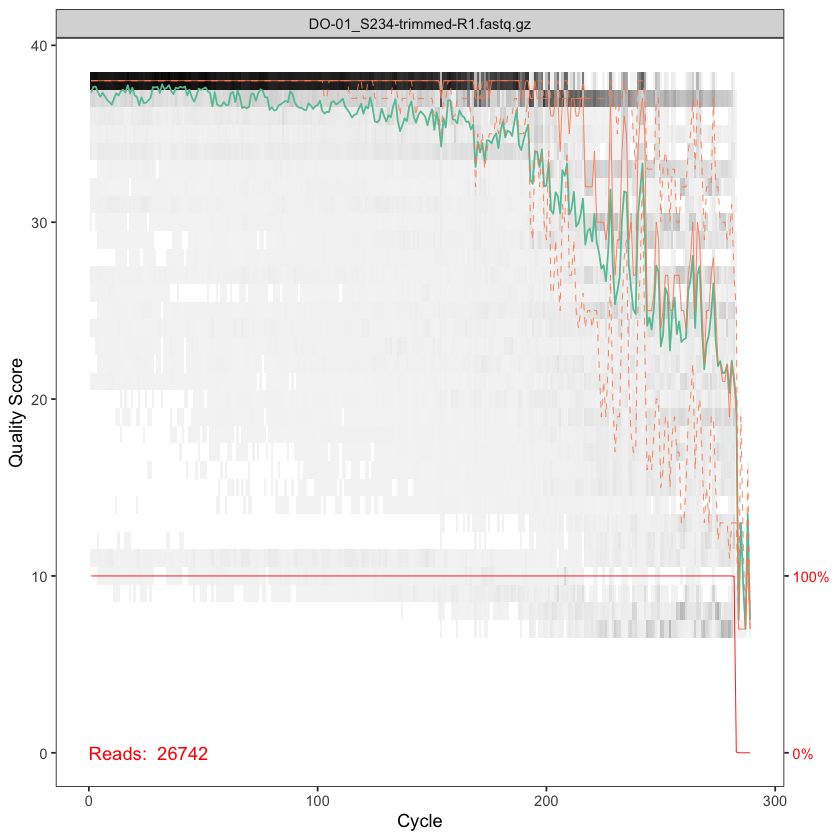

In [23]:
#Forward reads of one sample
plotQualityProfile(forward_reads[1])